In [1]:
import csv
import pandas as pd
import numpy as np
from array import array


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
input_data = pd.read_csv('actorsdataset.csv', index_col = [0])
input_data1 = input_data.astype(bool).astype(int)
G = nx.Graph(input_data1.values)
G1 = nx.Graph(input_data.values)
input_data


,Shah Rukh Khan,Salman Khan,Katrina Kaif,Deepika Padukone,Hrithik Roshan,Priyanka Chopra,Kareena Kapoor,Ranbir Kapoor,Kajol,John Abraham,...,Shabana Azmi,Benjamin Gilani,Dev Anand,Tanvi Azmi,Adi Irani,Achint Kaur,Yuvika Chaudhry,Pankaj Berry,Varun Dhawan,Nargis Fakhri
actorinfo$actorName,,,,,,,,,,,,,,,,,,,,,
Shah Rukh Khan,0,1,1,2,1,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Salman Khan,1,0,4,0,0,3,3,1,0,1,...,0,0,0,0,0,0,0,0,1,0
Katrina Kaif,1,4,0,0,2,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Deepika Padukone,2,0,0,0,0,0,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
Hrithik Roshan,1,0,2,0,0,4,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Achint Kaur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yuvika Chaudhry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pankaj Berry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


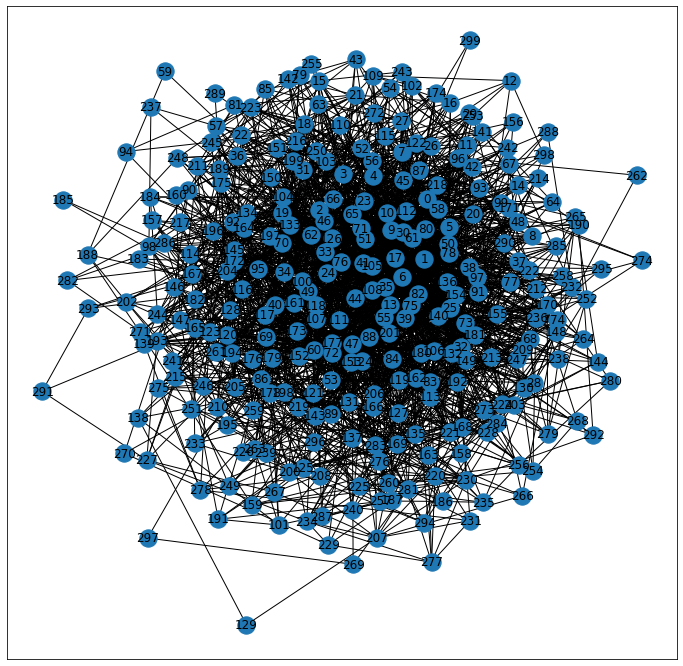

In [3]:
# some graphviz visualisation
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize = (12, 12))
nx.draw_networkx(G, pos)

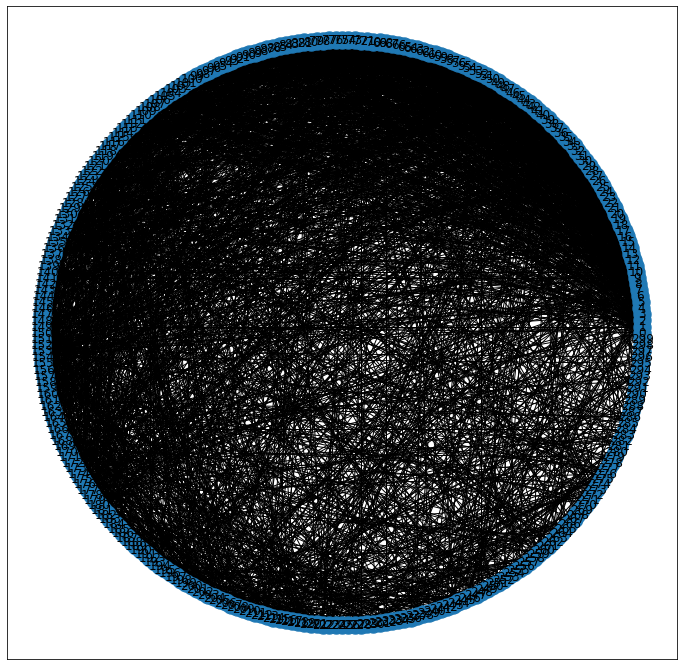

In [4]:
pos = nx.circular_layout(G)

plt.figure(figsize = (12, 12))
nx.draw_networkx(G, pos)

Degree Distribution graphs

In [5]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # used for degree distribution and powerlaw test


Calculating best minimal value for power law fit


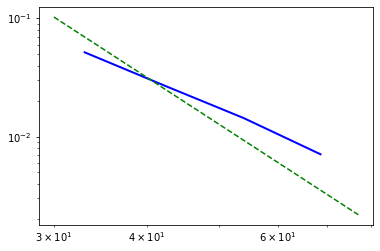

In [6]:
import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
fit = powerlaw.Fit(degree_sequence) 

fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)

In [7]:
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print (R, p)

-1.1980159863139554 0.23091079349870658


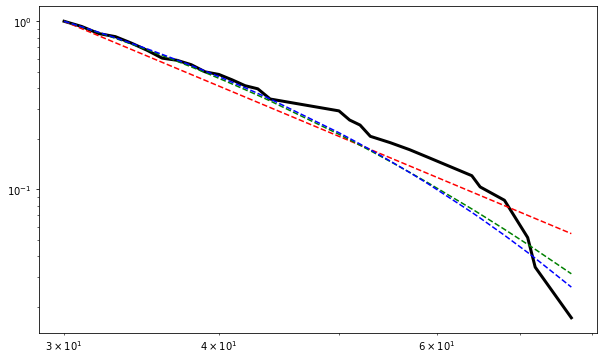

In [8]:
plt.figure(figsize=(10, 6))
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_ccdf(linewidth=3, color='black')
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--') #stretched_exponential

Text(0, 0.5, 'Frequency')

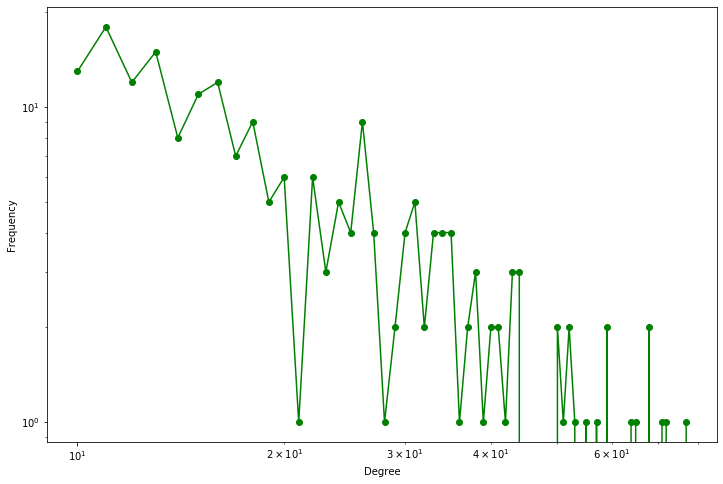

In [9]:
m=300
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[10:], degree_freq[10:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

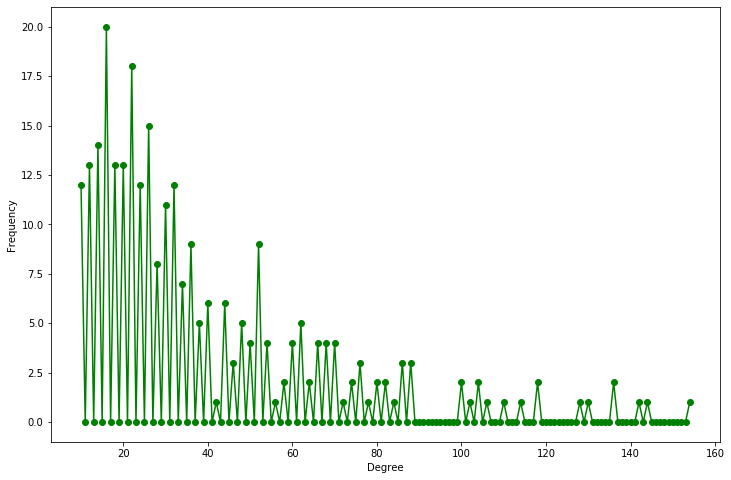

In [8]:
m=300
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.plot(degrees[10:], degree_freq[10:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

Modularity and creating best fit modules(Greedy modularity algorithm), the following code produced 6 modules.

In [10]:
#applying greedy algorithm to network and divide it to communities

from networkx.algorithms.community import greedy_modularity_communities

c = greedy_modularity_communities(G)


In [11]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)

top_level_communities = next(communities_generator)

next_level_communities = next(communities_generator)

sorted(map(sorted, next_level_communities))

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  1

In [12]:
import networkx.algorithms.community as nx_comm

nx_comm.modularity(G, next_level_communities)

nx_comm.modularity(G, nx_comm.label_propagation_communities(G))

-3.998710850893778e-17

All centrality measures

In [13]:
#betweenness centrality

betweenness = nx.betweenness_centrality(G)

betweenness

{0: 0.00426038519017242,
 1: 0.02450722391934337,
 2: 0.007395366075610973,
 3: 0.007876795617120555,
 4: 0.007427893820794741,
 5: 0.01862751119848066,
 6: 0.012327631498053184,
 7: 0.008903287021516881,
 8: 0.000354893719958777,
 9: 0.01775150530812101,
 10: 0.028227694863005408,
 11: 0.0013134314102202407,
 12: 0.00020137497857445548,
 13: 0.037762427499753434,
 14: 0.00033449178376298753,
 15: 0.0011447899102552022,
 16: 0.0009765928280958288,
 17: 0.026167473589622244,
 18: 0.0020377607829574094,
 19: 0.005141827971702752,
 20: 0.0031304995693728723,
 21: 0.0014532754070967463,
 22: 0.0009930377951912835,
 23: 0.011638092267632889,
 24: 0.015135052551305981,
 25: 0.008343327427855153,
 26: 0.0006448724851899325,
 27: 0.0029320165797117976,
 28: 0.001702830016351974,
 29: 0.00019790080726612237,
 30: 0.017612364968853312,
 31: 0.003807397039264523,
 32: 0.0056461651696561406,
 33: 0.010052262514464231,
 34: 0.00419174742629611,
 35: 0.025059038911953515,
 36: 0.00105368734363806,
 

In [14]:
#Eigenvalue Centrality
bet_centrality = nx.eigenvector_centrality(G)
print(bet_centrality)


{0: 0.09729942248954807, 1: 0.16569259883630338, 2: 0.0876006726473215, 3: 0.07913725697277943, 4: 0.08100803212642677, 5: 0.15123235923496262, 6: 0.14981164975696953, 7: 0.05035597640044812, 8: 0.03804382403906766, 9: 0.13345210696513982, 10: 0.17339052890982504, 11: 0.04312125468726994, 12: 0.0076730529687788485, 13: 0.19730149400322095, 14: 0.03780648201750567, 15: 0.026663394326970354, 16: 0.0228753907106035, 17: 0.18974345665386608, 18: 0.03425549180057871, 19: 0.08235606769064095, 20: 0.07559526124918499, 21: 0.019333892299097773, 22: 0.02124974647049847, 23: 0.10834075611333135, 24: 0.13480680427008732, 25: 0.11354963888217613, 26: 0.04905372428183292, 27: 0.046185847097105125, 28: 0.03249532186730788, 29: 0.026202204846045424, 30: 0.1622903033341045, 31: 0.04805591684135349, 32: 0.054109449826665185, 33: 0.07020347473718302, 34: 0.06013131149267263, 35: 0.17480107553539623, 36: 0.01569189464022991, 37: 0.03998490678911129, 38: 0.09939994089359516, 39: 0.08857927851147478, 40: 0

In [15]:
#Closeness Centrality
nx.closeness_centrality(G)

{0: 0.4807073954983923,
 1: 0.5377697841726619,
 2: 0.4791666666666667,
 3: 0.48148148148148145,
 4: 0.47086614173228347,
 5: 0.5190972222222222,
 6: 0.52,
 7: 0.45648854961832064,
 8: 0.4320809248554913,
 9: 0.5164075993091537,
 10: 0.5310834813499112,
 11: 0.42898134863701576,
 12: 0.3615477629987908,
 13: 0.5630885122410546,
 14: 0.4235127478753541,
 15: 0.4051490514905149,
 16: 0.4051490514905149,
 17: 0.5486238532110091,
 18: 0.43333333333333335,
 19: 0.4753577106518283,
 20: 0.4628482972136223,
 21: 0.40242261103633914,
 22: 0.4051490514905149,
 23: 0.49503311258278143,
 24: 0.5155172413793103,
 25: 0.4861788617886179,
 26: 0.43459302325581395,
 27: 0.44165435745937964,
 28: 0.42532005689900426,
 29: 0.4051490514905149,
 30: 0.5245614035087719,
 31: 0.4523449319213313,
 32: 0.46141975308641975,
 33: 0.48697068403908794,
 34: 0.47235387045813587,
 35: 0.5486238532110091,
 36: 0.392904073587385,
 37: 0.430835734870317,
 38: 0.48697068403908794,
 39: 0.48856209150326796,
 40: 0.5067

In [16]:
deg_centrality = nx.degree_centrality(G)
print(deg_centrality)

{0: 0.11371237458193979, 1: 0.21739130434782608, 2: 0.11705685618729096, 3: 0.11036789297658862, 4: 0.10702341137123746, 5: 0.18394648829431437, 6: 0.17391304347826086, 7: 0.07692307692307693, 8: 0.03678929765886287, 9: 0.16722408026755853, 10: 0.2140468227424749, 11: 0.05016722408026756, 12: 0.020066889632107024, 13: 0.25752508361204013, 14: 0.03678929765886287, 15: 0.046822742474916385, 16: 0.03678929765886287, 17: 0.23745819397993312, 18: 0.05351170568561873, 19: 0.0903010033444816, 20: 0.08361204013377926, 21: 0.043478260869565216, 22: 0.04013377926421405, 23: 0.14381270903010032, 24: 0.16722408026755853, 25: 0.12374581939799331, 26: 0.05016722408026756, 27: 0.05351170568561873, 28: 0.05016722408026756, 29: 0.026755852842809364, 30: 0.19732441471571907, 31: 0.07357859531772575, 32: 0.07692307692307693, 33: 0.11036789297658862, 34: 0.0802675585284281, 35: 0.22742474916387959, 36: 0.03678929765886287, 37: 0.05016722408026756, 38: 0.10702341137123746, 39: 0.12374581939799331, 40: 0.12

In [17]:
#Degree assortativity
r = nx.degree_assortativity_coefficient(G)
print(f"{r:3.1f}")


0.1


In [18]:
print(nx.average_clustering(G))

0.25435201491804854


In [19]:
#average shortest pathlength
print(nx.average_shortest_path_length(G))

2.363946488294314
